# Código de Regresión Logística para Carga de Script en Power BI

## Carga de librerías

In [3]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#import seaborn as sn
#import matplotlib.pyplot as plt

## Carga de los datos del archivo .csv

In [4]:
dataset = pd.read_csv("Sample_Dataset.csv", index_col=False)

## Separación de variables

In [5]:
y=dataset['Admitido']
x=dataset[['Promedio Pregrado', 'Experiencia', 'Examen Ingreso']]

## División de dataset para entrenamiento y pruebas

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

## Modelo

In [7]:
log = LogisticRegression(solver='lbfgs')
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = log.predict(x)
y_prob = log.predict_proba(x)

In [9]:
dataset['Prediccion'] = y_pred
dataset['Probabilidad Aceptacion'] = y_prob[:,1]

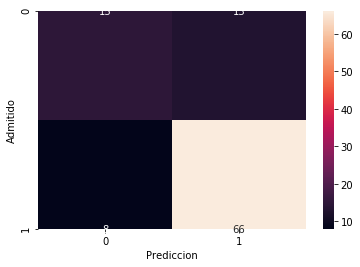

In [10]:
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Admitido'], colnames=['Prediccion'])
sn.heatmap(confusion_matrix, annot=True, fmt="d")

plt.show()


In [87]:
confusion_matrix

Prediccion,0,1
Admitido,,
0,18,10
1,4,70
